In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [41]:
data = pd.read_csv('coursework_1_data_2019.csv')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_area  152 non-null    object 
 1   2008_cases_total      152 non-null    int64  
 2   2013_cases_total      152 non-null    int64  
 3   2018_cases_total      152 non-null    int64  
 4   2008_pop_total        152 non-null    int64  
 5   proportion            152 non-null    float64
 6   2013_pop_total        152 non-null    int64  
 7   2018_pop_total        152 non-null    int64  
 8   2008_cases_male       152 non-null    int64  
 9   2013_cases_male       152 non-null    int64  
 10  2018_cases_male       152 non-null    int64  
 11  2008_pop_male         152 non-null    int64  
 12  2013_pop_male         152 non-null    int64  
 13  2018_pop_male         152 non-null    int64  
 14  2008_cases_female     152 non-null    int64  
 15  2013_cases_female     1

In [43]:
data.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,proportion,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,0.0034,179030,181779,187,190,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,0.0016,344062,355955,212,204,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,0.0016,244010,257883,148,186,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,0.0026,172975,189334,157,129,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,0.0020,164807,170463,138,145,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [44]:
data_numeric = pd.get_dummies(data)
# check out the new dataFrame
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Columns: 192 entries, 2008_cases_total to local_authority_type_unitary_authority
dtypes: float64(1), int64(25), uint8(166)
memory usage: 55.6 KB


In [45]:
data_final = data_numeric.drop(['2008_cases_total','2013_cases_total','2018_cases_total','2008_pop_total','2013_pop_total', '2018_pop_total','2008_cases_male','2013_cases_male','2018_cases_male','2008_pop_male','2013_pop_male','2018_pop_male','2008_cases_female','2013_cases_female','2018_cases_female','2008_pop_female','2013_pop_female','2018_pop_female','total_budget'], axis=1)
# double check the result
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Columns: 173 entries, proportion to local_authority_type_unitary_authority
dtypes: float64(1), int64(6), uint8(166)
memory usage: 33.1 KB


In [46]:
df = data_final
# subset the data
data_1 = data_numeric.loc[:,['proportion', 'clean_air', 'clean_environ', 'health_training', 'school_awareness','media_awareness','sub_counselling']]
# build the model.
# Note that we use this equation to formalute the regression model
# 'proportion ~ clean_air + clean_environ + health_training + school_awareness + media_awareness + sub_counselling'
# the left-hand side is the y variable and right-hand side is the x variables

model_proportion_1 = sm.formula.ols('proportion ~ clean_air + clean_environ + health_training + school_awareness + media_awareness + sub_counselling', data_1).fit()
model_proportion_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.2543
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.957
Time:                        14:51:01   Log-Likelihood:                 787.68
No. Observations:                 152   AIC:                            -1561.
Df Residuals:                     145   BIC:                            -1540.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0030      0.000     16.396      0.000       0.003       0.003
clean_air           3.3e-09    3.8e-09      0.869      0.386   -4.21e-09    1.08e-08
clean_environ    -8.308e-10   3.05e-09     -0.273      0.786   -6.85e-09    5.19e-09
health_training   2.132e-09   7.87e-09      0.271      0.787   -1.34e-08    1.77e-08
school_awareness -2.719e-09   3.39e-09     -0.803      0.423   -9.41e-09    3.97e-09
media_awareness  -3.748e-10   6.16e-09     -0.061      0.952   -1.26e-08    1.18e-08
sub_counselling   2.317e-09   1.06e-08      0.218      0.828   -1.87e-08    2.33e-08
==============================================================================
Omnibus:                       28.772   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.515
Skew:                           1.103   Prob(JB):                     4.33e-09
Kurtosis:                       4.101   Cond. No.                     2.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [48]:
data_1_new = drop_column_using_vif_(data_1.drop('proportion', axis=1))

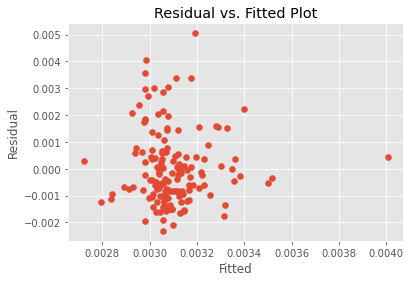

In [49]:
# plot 
plt.scatter(model_proportion_1.fittedvalues, model_proportion_1.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()